<a href="https://colab.research.google.com/github/FachaV/Klein-Gordon/blob/main/Examen_solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Diego Macías Gutiérrez
#Lic. Física
#Curso de solitones
#Examen parcial  1
#Problema 3: incisos b) y c)



#Parte 1 creación del Módulo y su ejecución
#Me base en el código pre-establecido en wikipedia en la fuente que nos compartieron, usando transformada rápida de Fourier, es mi primer módulo creado por
#mi cuenta


######### MODULO ##########3

# Definición del módulo KdVSolver


import numpy as np

class KdVSolver:
    def __init__(self, x_domain, t_steps, dx, dt):
        self.x_domain = x_domain  # Dominio espacial
        self.t_steps = t_steps     # Definimos las iteraciones
        self.dx = dx               # Componente espacial
        self.dt = dt               # Paso de tiempo

        # Valor inicial de las variables definidas
        self.x = np.arange(x_domain[0], x_domain[1], dx)  # Cuadrícula espacial
        self.nx = len(self.x)
        self.k = 2 * np.pi * np.fft.fftfreq(self.nx, d=dx)  # Espacio de frecuencias
        self.u = None  # Para guardar la solución
        self.history = []  # Initialize history to store solution at each time step

    def set_initial_conditions(self, initial_profile):
        self.u = initial_profile(self.x)  # Perfil inicial
        self.history.append(self.u.copy())  # Store initial state

    def _nonlinear_term(self, u):
        u_x = np.fft.ifft(1j * self.k * np.fft.fft(u)).real  # Derivada de u en x
        return -6 * u * u_x

    def step(self):
        # Paso temporal
        u_hat = np.fft.fft(self.u)
        nonlinear_term = np.fft.fft(self._nonlinear_term(self.u))
        u_hat += nonlinear_term * self.dt / 2

        linear_term = -(1j * self.k) ** 3 * u_hat
        u_hat *= np.exp(linear_term * self.dt)

        self.u = np.fft.ifft(u_hat).real
        u_hat = np.fft.fft(self.u)
        nonlinear_term = np.fft.fft(self._nonlinear_term(self.u))
        u_hat += nonlinear_term * self.dt / 2
        self.u = np.fft.ifft(u_hat).real
        self.history.append(self.u.copy())  # Store solution at current time step


    def solve(self):
        for _ in range(self.t_steps):
            self.step()
        return self.u

<ipython-input-28-e814ba10779d>:50: RuntimeWarning: overflow encountered in exp
  u_hat *= np.exp(linear_term * self.dt)
<ipython-input-28-e814ba10779d>:50: RuntimeWarning: invalid value encountered in multiply
  u_hat *= np.exp(linear_term * self.dt)


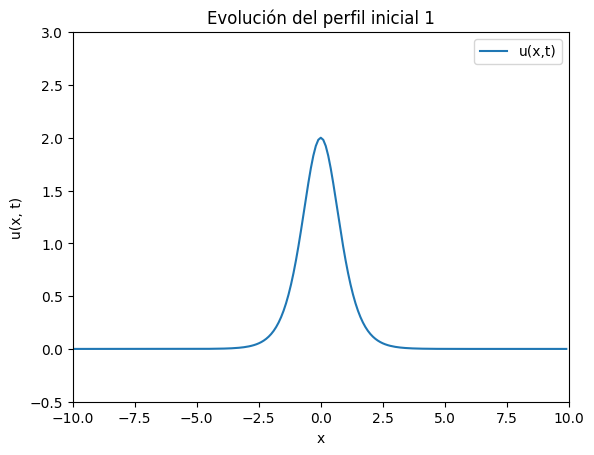

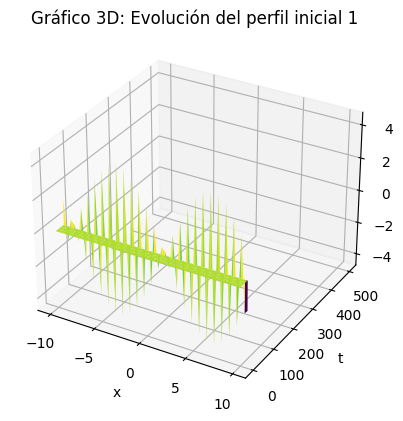

In [29]:
# Perfil 1 - Animación 2D y Gráfico 3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Definir el perfil inicial
def initial_profile_1(x):
    return 2 / np.cosh(x) ** 2

# Parámetros
x_domain = (-10, 10)  # Dominio espacial
t_steps = 500         # Número de pasos de tiempo
dx = 0.1              # Paso espacial
dt = 0.01             # Paso de tiempo

# Crear el solver
solver = KdVSolver(x_domain, t_steps, dx, dt)
solver.set_initial_conditions(initial_profile_1)

# Resolver la KdV
solver.solve()

# Animación 2D
fig, ax = plt.subplots()
line, = ax.plot(solver.x, solver.history[0], label='u(x,t)')
ax.set_ylim(-0.5, 3)
ax.set_xlim(x_domain[0], x_domain[1])
ax.set_title('Evolución del perfil inicial 1')
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.legend()

def update(frame):
    line.set_ydata(solver.history[frame])  # Actualizar la línea con los datos del nuevo marco
    return line,

ani = FuncAnimation(fig, update, frames=len(solver.history), blit=True)
plt.show()

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear una malla para x, t y u
#Ajustamos el rango de t_mesh para que coincida con el número de pasos de tiempo
x_mesh, t_mesh = np.meshgrid(solver.x, np.arange(t_steps +1 ))
#Ajustamos u_mesh para que coincida con la forma de x_mesh y t_mesh
u_mesh = np.array(solver.history)

ax.plot_surface(x_mesh, t_mesh, u_mesh, cmap='viridis')

ax.set_title('Gráfico 3D: Evolución del perfil inicial 1')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

plt.show()

<ipython-input-30-e814ba10779d>:50: RuntimeWarning: overflow encountered in exp
  u_hat *= np.exp(linear_term * self.dt)
<ipython-input-30-e814ba10779d>:50: RuntimeWarning: invalid value encountered in multiply
  u_hat *= np.exp(linear_term * self.dt)


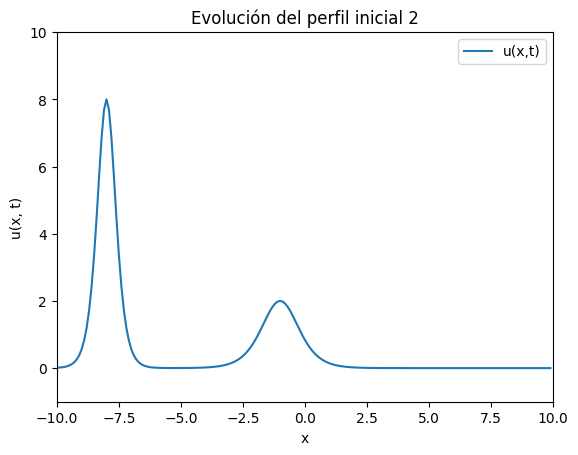

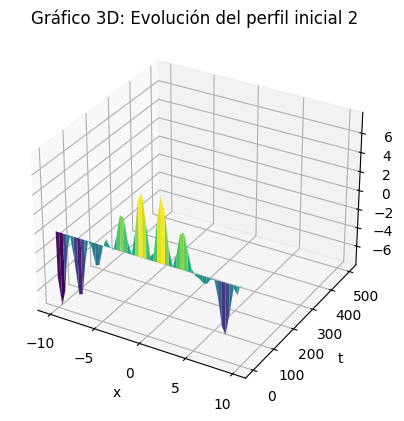

In [34]:
# Perfil 2 - Animación 2D y Gráfico 3D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Definir el perfil inicial
def initial_profile_2(x):
    return 8 * (1 / np.cosh(2 * x + 16)) ** 2 + 2 * (1 / np.cosh(x + 1)) ** 2

# Parámetros
x_domain = (-10, 10)  # Dominio espacial
t_steps = 500         # Número de pasos de tiempo
dx = 0.1              # Paso espacial
dt = 0.01             # Paso de tiempo

# Crear el solver
solver = KdVSolver(x_domain, t_steps, dx, dt)
solver.set_initial_conditions(initial_profile_2)

# Resolver la KdV
solver.solve()

# Animación 2D
fig, ax = plt.subplots()
line, = ax.plot(solver.x, solver.history[0], label='u(x,t)')
ax.set_ylim(-1, 10)
ax.set_xlim(x_domain[0], x_domain[1])
ax.set_title('Evolución del perfil inicial 2')
ax.set_xlabel('x')
ax.set_ylabel('u(x, t)')
ax.legend()

def update(frame):
    line.set_ydata(solver.history[frame])  # Actualizar la línea con los datos del nuevo marco
    return line,

ani = FuncAnimation(fig, update, frames=len(solver.history), blit=True)
plt.show()

# Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear una malla para x, t y u
# Adding +1 to t_steps to include the initial condition in t_mesh
x_mesh, t_mesh = np.meshgrid(solver.x, np.arange(t_steps + 1))
u_mesh = np.array(solver.history)

ax.plot_surface(x_mesh, t_mesh, u_mesh, cmap='viridis')

ax.set_title('Gráfico 3D: Evolución del perfil inicial 2')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')

plt.show()
